# 맵플롯립 Matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import platform
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus']=False

if platform.system() == 'Darwin':  # Mac
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # Windows
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~')

## 지원 되는 플롯 유형

- 라인플롯(line plot) : plot()
- 바 차트(bar chart) : bar()
- 스캐터플롯(scatter plot) : scatter() 
- 히스토그램(histogram) : hist()
- 박스플롯(box plot) : boxplot()
- 파이 차트(pie chart) : pie()
- 기타 다양한 유형의 차트/플롯을 지원 : 관련 홈페이지 참고
     - https://matplotlib.org/stable/plot_types/index.html

## 1. 막대그래프 : bar(), barh(), df.plot()

### 1-1. 세로 막대 그래프 그리기: bar()
- bar(x,y,color=[],alpha=)
    - color = [] : 색상값 설정
    - alpha = 투명도 설정

matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)


https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

#### 데이터셋

- 미세먼지 데이터 : fine_dust.xlsx

In [3]:
dust = pd.read_excel('data/fine_dust.xlsx', index_col='area')
dust.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, Seoul to Jeju
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2001    14 non-null     float64
 1   2002    14 non-null     float64
 2   2003    14 non-null     float64
 3   2004    14 non-null     float64
 4   2005    14 non-null     float64
 5   2006    14 non-null     int64  
 6   2007    14 non-null     int64  
 7   2008    14 non-null     float64
 8   2009    14 non-null     float64
 9   2010    14 non-null     float64
 10  2011    14 non-null     int64  
 11  2012    14 non-null     float64
 12  2013    14 non-null     float64
 13  2014    14 non-null     float64
 14  2015    14 non-null     float64
 15  2016    14 non-null     float64
 16  2017    14 non-null     float64
 17  2018    14 non-null     float64
 18  2019    14 non-null     float64
dtypes: float64(16), int64(3)
memory usage: 2.2+ KB


In [4]:
dust.index

Index(['Seoul', 'Gyeonggi', 'Incheon', 'Busan', 'Daegu', 'Gwangju', 'Daejeon',
       'Ulsan', 'Sejong', 'Gangwon', 'Chungcheong', 'Jeolla', 'Gyeongsang',
       'Jeju'],
      dtype='object', name='area')

In [5]:
dust.columns

Index([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype='int64')

#### 막대그래프 : bar(x, height, width=0.8)

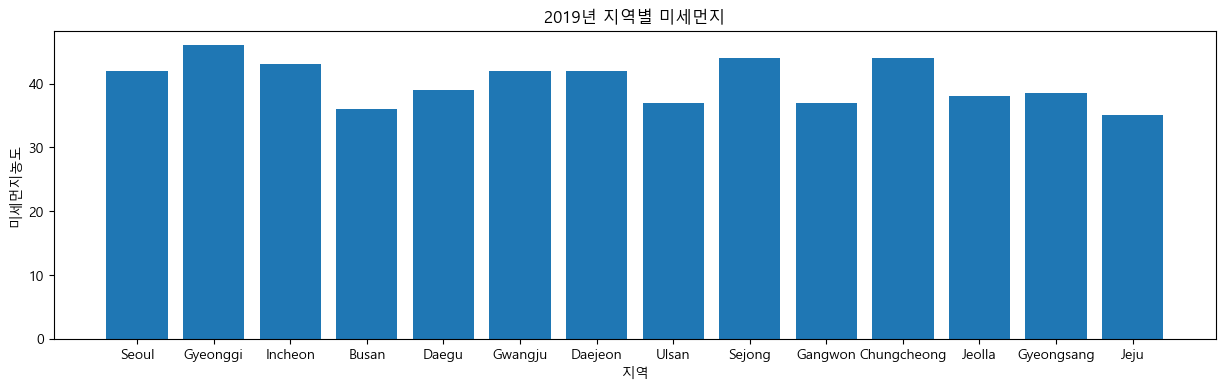

In [8]:
# 2019년 미세먼지
plt.figure(figsize=(15,4))
plt.bar(dust.index, dust[2019])
plt.title('2019년 지역별 미세먼지')
plt.xlabel('지역')
plt.ylabel('미세먼지농도')
plt.show()

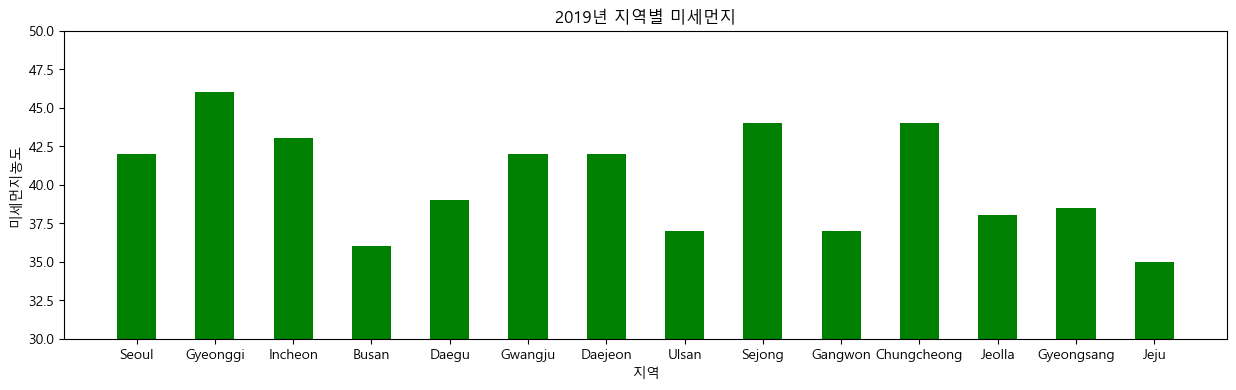

In [11]:
plt.figure(figsize=(15,4))
plt.bar(dust.index, dust[2019], width=0.5, color='green')
plt.title('2019년 지역별 미세먼지')
plt.xlabel('지역')
plt.ylabel('미세먼지농도')
plt.ylim(30,50)
plt.show()

In [14]:
data = dust[2019].sort_values(ascending=False)
data

area
Gyeonggi       46.0
Sejong         44.0
Chungcheong    44.0
Incheon        43.0
Seoul          42.0
Gwangju        42.0
Daejeon        42.0
Daegu          39.0
Gyeongsang     38.5
Jeolla         38.0
Ulsan          37.0
Gangwon        37.0
Busan          36.0
Jeju           35.0
Name: 2019, dtype: float64

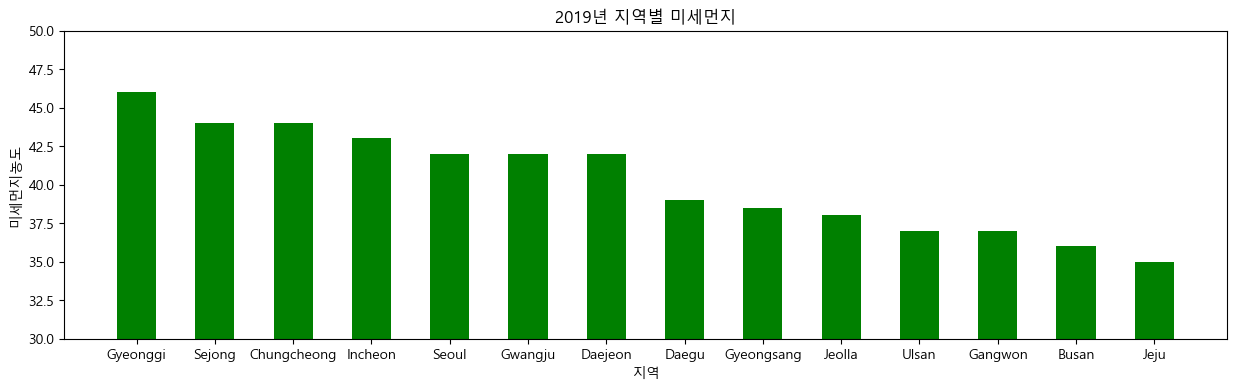

In [16]:
# 값의 크기순으로 그리기
plt.figure(figsize=(15,4))
plt.bar(data.index, data, width=0.5, color='green')
plt.title('2019년 지역별 미세먼지')
plt.xlabel('지역')
plt.ylabel('미세먼지농도')
plt.ylim(30,50)
plt.show()

- plt.text(x, y, str, fontdict={})

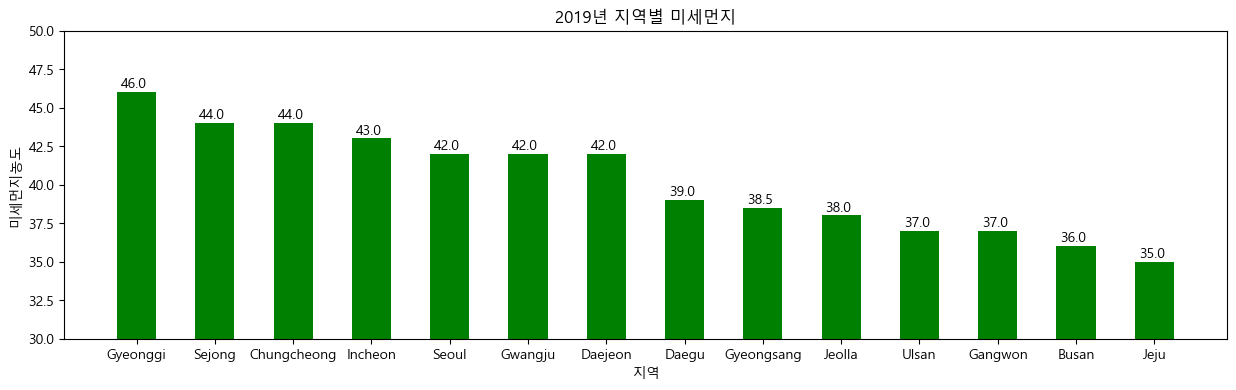

In [21]:
# 값을 막대 위에 표시하기
plt.figure(figsize=(15,4))
plt.bar(data.index, data, width=0.5, color='green')
plt.title('2019년 지역별 미세먼지')
plt.xlabel('지역')
plt.ylabel('미세먼지농도')
for i in range(data.shape[0]):
    plt.text(i-0.2, data.iloc[i]+0.3, data.iloc[i])
    
plt.ylim(30,50)
plt.show()

In [22]:
# 그룹(묶음) 막대그래프

data = dust.loc[:, 2018:2019]
data

,2018,2019
area,,
Seoul,40.0,42.0
Gyeonggi,44.0,46.0
Incheon,40.0,43.0
Busan,41.0,36.0
Daegu,39.0,39.0
Gwangju,41.0,42.0
Daejeon,44.0,42.0
Ulsan,40.0,37.0
Sejong,40.0,44.0


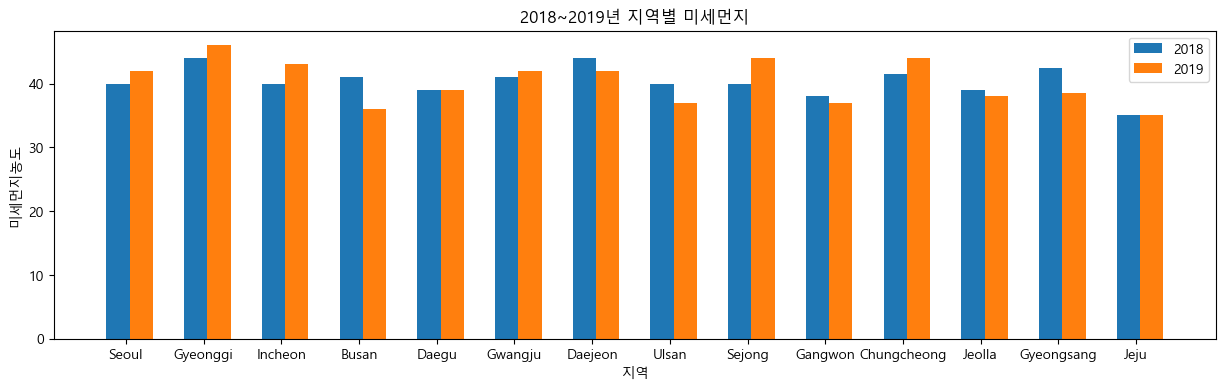

In [30]:
x = np.arange(data.shape[0])

plt.figure(figsize=(15,4))
plt.bar(x, data[2018], width=0.3, label='2018')
plt.bar(x+0.3, data[2019], width=0.3, label='2019')
plt.title('2018~2019년 지역별 미세먼지')
plt.xlabel('지역')
plt.ylabel('미세먼지농도')
plt.xticks(x+0.1, data.index)
plt.legend()
plt.show()

In [31]:
data = dust.loc[:'Daegu', 2016:2019]
data

,2016,2017,2018,2019
area,,,,
Seoul,48.0,44.0,40.0,42.0
Gyeonggi,53.0,51.0,44.0,46.0
Incheon,49.0,46.0,40.0,43.0
Busan,44.0,44.0,41.0,36.0
Daegu,43.0,42.0,39.0,39.0


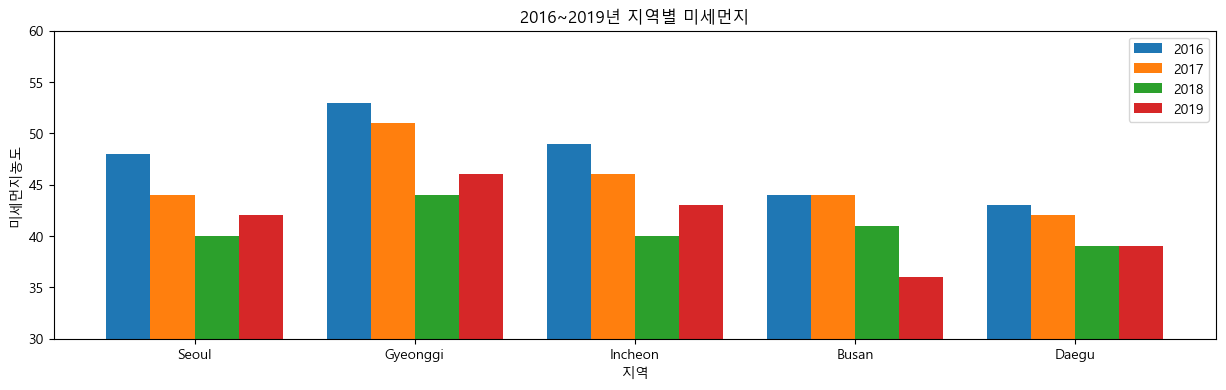

In [34]:
x = np.arange(data.shape[0])

plt.figure(figsize=(15,4))
for year in data.columns:
    plt.bar(x, data[year], width=0.2, label=str(year))
    x = x+0.2

plt.title('2016~2019년 지역별 미세먼지')
plt.xlabel('지역')
plt.ylabel('미세먼지농도')
plt.xticks(x-0.5, data.index)
plt.ylim(30, 60)
plt.legend()
plt.show()

### 1-2. 가로 막대 그래프 그리기 : barh()

- barh(x,y,color=[], alpha=)

matplotlib.pyplot.barh(y, width, height=0.8, left=None, *, align='center', data=None, **kwargs)

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html

#### 데이터셋

In [35]:
dust

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
area,,,,,,,,,,,,,,,,,,,
Seoul,71.0,76.0,69.0,61.0,58.0,60,61,55.0,54.0,49.0,47,41.0,45.0,46.0,45.0,48.0,44.0,40.0,42.0
Gyeonggi,71.0,74.0,68.0,67.0,65.0,68,66,60.0,60.0,58.0,56,49.0,54.0,54.0,53.0,53.0,51.0,44.0,46.0
Incheon,52.0,57.0,61.0,62.0,61.0,68,64,57.0,60.0,55.0,55,47.0,49.0,49.0,53.0,49.0,46.0,40.0,43.0
Busan,60.0,69.0,55.0,60.0,58.0,59,57,51.0,49.0,49.0,47,43.0,49.0,48.0,46.0,44.0,44.0,41.0,36.0
Daegu,67.0,71.0,59.0,0.0,55.0,54,53,57.0,48.0,51.0,47,42.0,45.0,45.0,46.0,43.0,42.0,39.0,39.0
Gwangju,57.0,52.0,36.0,46.0,49.0,55,52,50.0,46.0,45.0,43,38.0,42.0,41.0,43.0,40.0,40.0,41.0,42.0
Daejeon,48.0,53.0,43.0,49.0,48.0,49,49,45.0,43.0,44.0,44,39.0,42.0,41.0,46.0,44.0,45.0,44.0,42.0
Ulsan,0.0,54.0,40.0,50.0,50.0,52,53,54.0,49.0,48.0,49,46.0,47.0,46.0,46.0,43.0,43.0,40.0,37.0
Sejong,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,46.0,47.0,40.0,44.0


#### 가로막대그래프

- plt.barh(y, width, height=0.8)

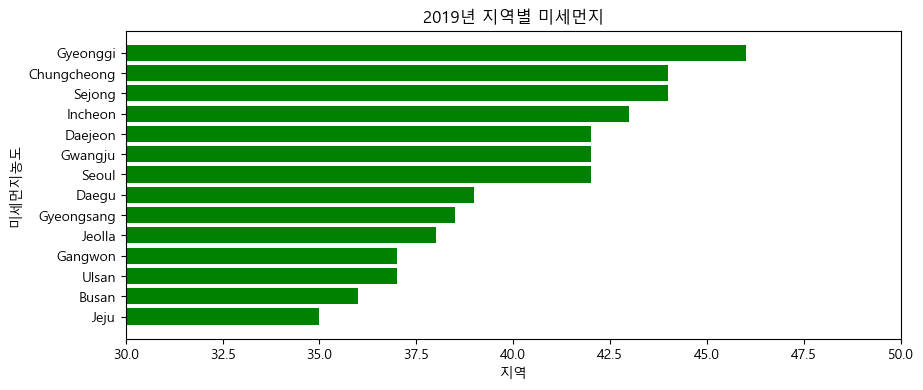

In [40]:
data = dust[2019].sort_values()
plt.figure(figsize=(10,4))
plt.barh(data.index, data, color='green')
plt.title('2019년 지역별 미세먼지')
plt.xlabel('지역')
plt.ylabel('미세먼지농도')
plt.xlim(30,50)
plt.show()

- 막대 옆에 값 출력하기

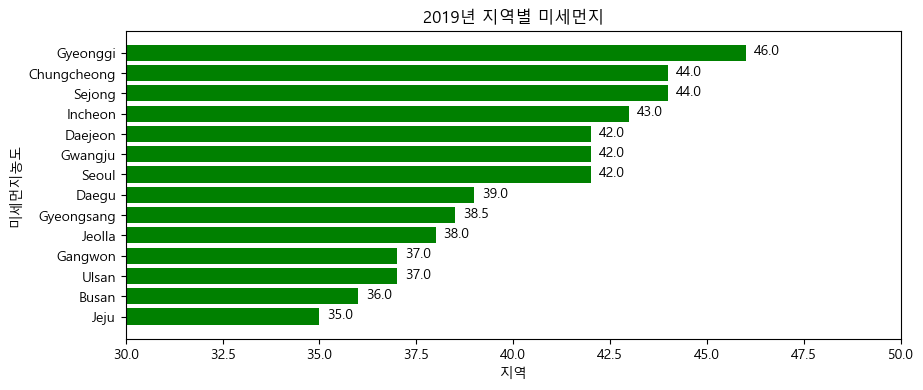

In [42]:
data = dust[2019].sort_values()
plt.figure(figsize=(10,4))
plt.barh(data.index, data, color='green')
plt.title('2019년 지역별 미세먼지')
plt.xlabel('지역')
plt.ylabel('미세먼지농도')
for i in range(data.shape[0]):
    plt.text(data.iloc[i]+0.2, i-0.1, data.iloc[i])

plt.xlim(30,50)
plt.show()

### 1-3. 데이터프레임으로 막대그래프 그리기

- **데이터프레임.plot**(kind=그래프종류, grid=T/F, figsize=그래프크기)
- **plt.bar**(데이터프레임.변수1, 데이터프레임.변수2)
- **plt.barh**(데이터프레임.변수1, 데이터프레임.변수2)

**데이터프레임.plot()으로 막대그래프 그리기**

- plt.xticks()의 rotation 인수에 따라 가로형 또는 세로형 막대그래프 생성
    - plt.xticks(ticks=None, labels=None, **kwargs)
    - plt.xticks(ticks=None, labels=None) : vertical 기본
    - plt.xticks(ticks=None, labels=None, rotation='vertical') : 가로형막대
    - plt.xticks(ticks=None, labels=None, rotation='horizontal') : 세로형막대

#### 데이터셋

In [43]:
dust

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
area,,,,,,,,,,,,,,,,,,,
Seoul,71.0,76.0,69.0,61.0,58.0,60,61,55.0,54.0,49.0,47,41.0,45.0,46.0,45.0,48.0,44.0,40.0,42.0
Gyeonggi,71.0,74.0,68.0,67.0,65.0,68,66,60.0,60.0,58.0,56,49.0,54.0,54.0,53.0,53.0,51.0,44.0,46.0
Incheon,52.0,57.0,61.0,62.0,61.0,68,64,57.0,60.0,55.0,55,47.0,49.0,49.0,53.0,49.0,46.0,40.0,43.0
Busan,60.0,69.0,55.0,60.0,58.0,59,57,51.0,49.0,49.0,47,43.0,49.0,48.0,46.0,44.0,44.0,41.0,36.0
Daegu,67.0,71.0,59.0,0.0,55.0,54,53,57.0,48.0,51.0,47,42.0,45.0,45.0,46.0,43.0,42.0,39.0,39.0
Gwangju,57.0,52.0,36.0,46.0,49.0,55,52,50.0,46.0,45.0,43,38.0,42.0,41.0,43.0,40.0,40.0,41.0,42.0
Daejeon,48.0,53.0,43.0,49.0,48.0,49,49,45.0,43.0,44.0,44,39.0,42.0,41.0,46.0,44.0,45.0,44.0,42.0
Ulsan,0.0,54.0,40.0,50.0,50.0,52,53,54.0,49.0,48.0,49,46.0,47.0,46.0,46.0,43.0,43.0,40.0,37.0
Sejong,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,46.0,47.0,40.0,44.0


#### 막대그래프

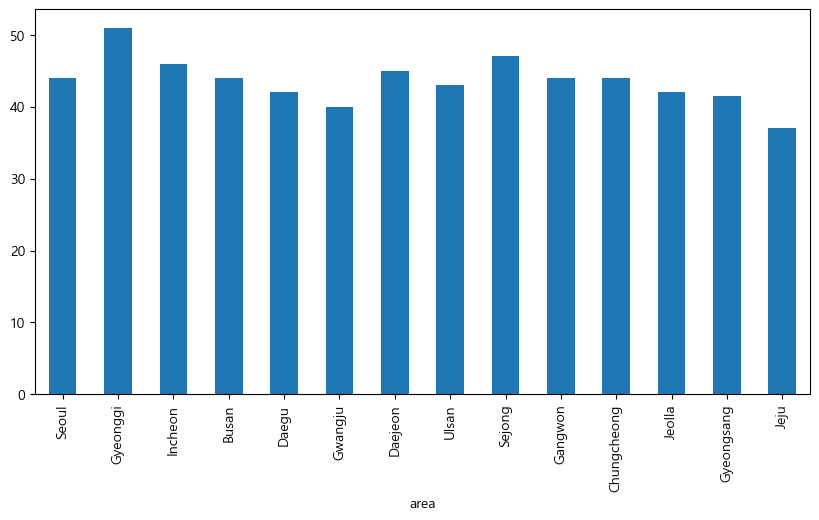

In [44]:
data = dust[2017]
data.plot(kind='bar', figsize=(10,5), title='2017')
plt.show()

**데이터프레임.plot()를 이용하여 묶음 막대그래프 그리기**
- 그래프를 그리기 위한 데이터를 지정하지 않는 경우
- 데이터프레임에 있는 모든 수치데이터를 이용하여 묶음 막대그래프를 그림

#### 데이터셋

In [55]:
data = dust.loc['Seoul':'Daegu', 2016:2019]
data

,2016,2017,2018,2019
area,,,,
Seoul,48.0,44.0,40.0,42.0
Gyeonggi,53.0,51.0,44.0,46.0
Incheon,49.0,46.0,40.0,43.0
Busan,44.0,44.0,41.0,36.0
Daegu,43.0,42.0,39.0,39.0


#### 묶음 막대그래프

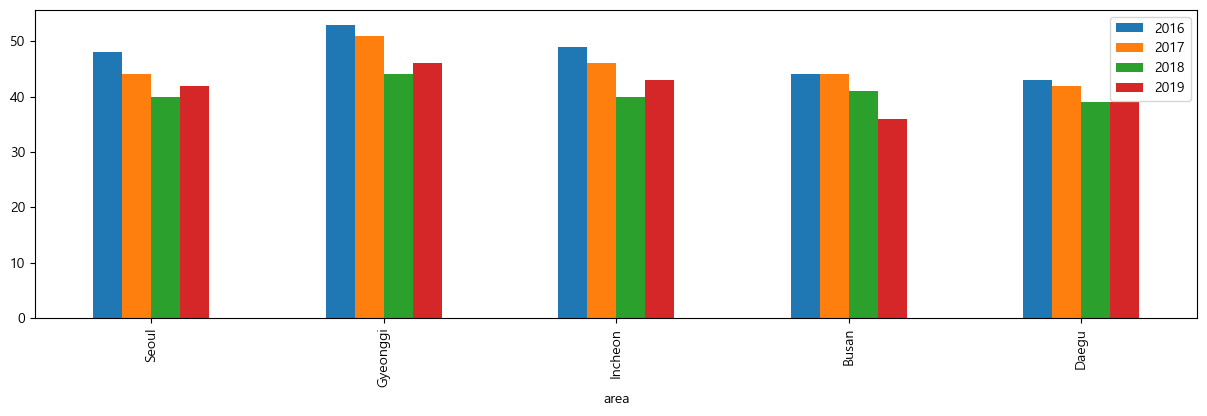

In [56]:
data.plot(kind='bar', figsize=(15,4))
plt.show()

**정렬된 데이터를 이용하여 막대그래프 그리기**

In [53]:
data2 = data.sort_values(2019)
data2

,2016,2017,2018,2019
area,,,,
Busan,44.0,44.0,41.0,36.0
Daegu,43.0,42.0,39.0,39.0
Seoul,48.0,44.0,40.0,42.0
Incheon,49.0,46.0,40.0,43.0
Gyeonggi,53.0,51.0,44.0,46.0


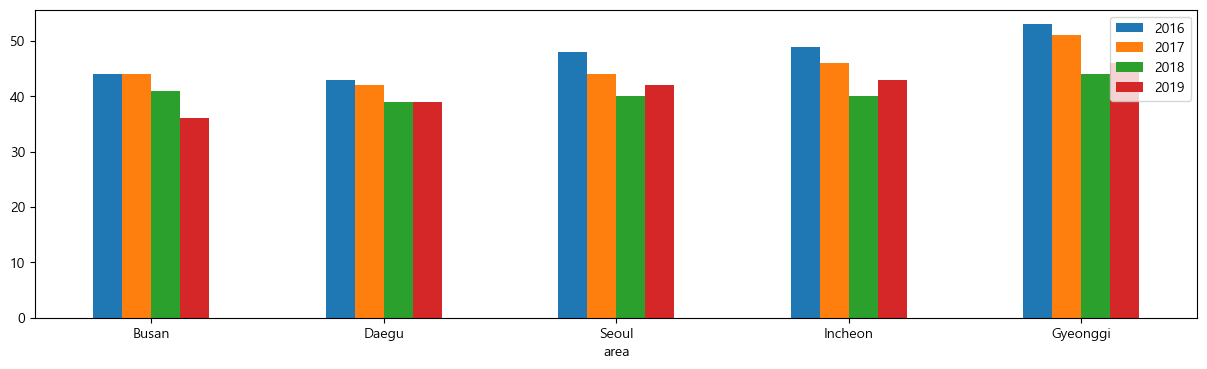

In [58]:
data2.plot(kind='bar', figsize=(15,4))
plt.xticks(np.arange(data2.shape[0]), data2.index, rotation=0)
plt.show()

## 2. 산점도(scatter plot) : scatter()

- 두 수치형 변수간의 관계를 나타내기 위해 사용하는 그래프
    - 상관관계 표현 : 선형성

- 형식 : matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)


https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

#### 예제 데이터

- 2022년 건강검진 데이터 : 백만명 중 1000명 샘플링
- 데이터파일 : 'health_screenings_2022_1000ea.csv'
- 출처 : 국민건강보험공단 (공공데이터포털)

In [61]:
health = pd.read_csv('data/health_screenings_2022_1000ea.csv', encoding='utf-8')
health.head()

,year,city_code,gender,age_code,height,weight,waist,eye_left,eye_right,hear_left,...,urine_protein,serum,AST,ALT,GTP,smoking,drinking,oral_check,dental_caries,tartar
0,2022,11,1,9,165,60,75.0,1.0,1.2,1.0,...,1.0,1.0,23.0,13.0,14.0,2.0,1.0,0,NaN,NaN
1,2022,11,2,13,155,60,88.0,0.8,1.0,1.0,...,1.0,0.6,17.0,18.0,13.0,1.0,0.0,0,NaN,NaN
2,2022,31,2,13,150,50,73.6,0.7,0.6,1.0,...,1.0,0.8,14.0,9.0,12.0,1.0,0.0,1,0.0,0.0
3,2022,41,1,17,165,55,78.0,0.8,0.8,1.0,...,1.0,1.1,19.0,13.0,10.0,2.0,0.0,0,NaN,NaN
4,2022,41,1,15,160,50,71.0,1.0,0.8,1.0,...,1.0,1.6,17.0,9.0,12.0,1.0,1.0,0,NaN,NaN


In [62]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           1000 non-null   int64  
 1   city_code      1000 non-null   int64  
 2   gender         1000 non-null   int64  
 3   age_code       1000 non-null   int64  
 4   height         1000 non-null   int64  
 5   weight         1000 non-null   int64  
 6   waist          1000 non-null   float64
 7   eye_left       1000 non-null   float64
 8   eye_right      1000 non-null   float64
 9   hear_left      1000 non-null   float64
 10  hear_right     1000 non-null   float64
 11  systolic       993 non-null    float64
 12  diastolic      993 non-null    float64
 13  blood_sugar    993 non-null    float64
 14  cholesterol    409 non-null    float64
 15  triglycerides  409 non-null    float64
 16  HDL            409 non-null    float64
 17  LDL            405 non-null    float64
 18  hemoglobi

#### 산점도 그리기

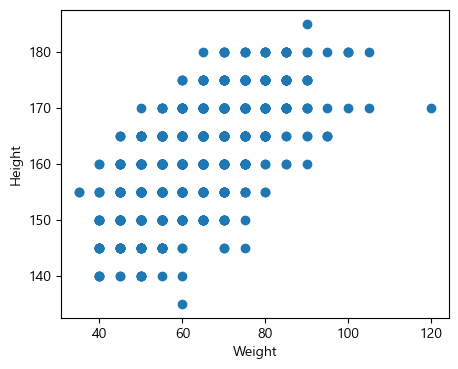

In [64]:
plt.figure(figsize=(5,4))
plt.scatter(health.weight, health.height)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

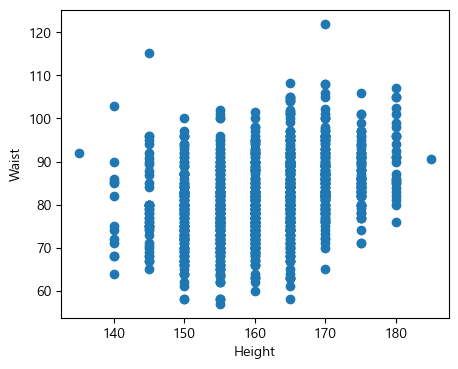

In [65]:
plt.figure(figsize=(5,4))
plt.scatter(health.height, health.waist)
plt.xlabel('Height')
plt.ylabel('Waist')
plt.show()

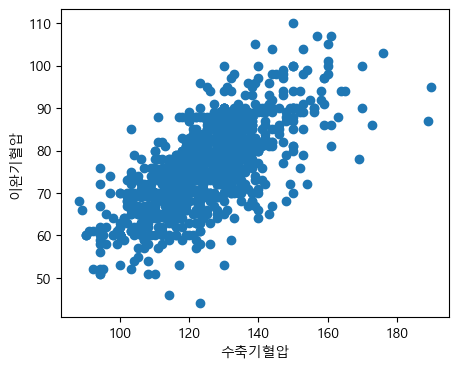

In [66]:
plt.figure(figsize=(5,4))
plt.scatter(health.systolic, health.diastolic)
plt.xlabel('수축기혈압')
plt.ylabel('이완기혈압')
plt.show()

### 산점도의 marker 변경

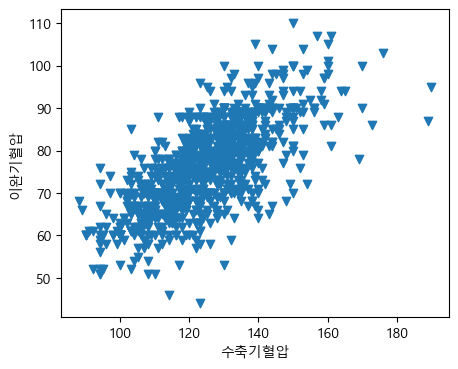

In [67]:
plt.figure(figsize=(5,4))
plt.scatter(health.systolic, health.diastolic, marker='v')
plt.xlabel('수축기혈압')
plt.ylabel('이완기혈압')
plt.show()

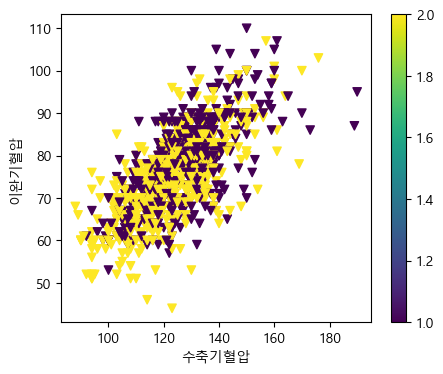

In [69]:
plt.figure(figsize=(5,4))
plt.scatter(health.systolic, health.diastolic, marker='v', 
            c=health.gender)
plt.colorbar()
plt.xlabel('수축기혈압')
plt.ylabel('이완기혈압')
plt.show()

In [70]:
health.gender.value_counts()

gender
2    510
1    490
Name: count, dtype: int64

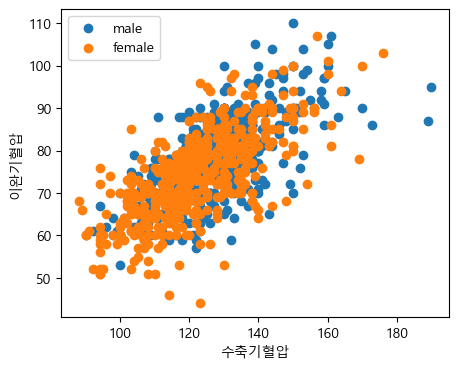

In [71]:
male = health[health.gender == 1]
female = health[health.gender == 2]

plt.figure(figsize=(5,4))
plt.scatter(male.systolic, male.diastolic, label='male')
plt.scatter(female.systolic, female.diastolic, label='female')

plt.xlabel('수축기혈압')
plt.ylabel('이완기혈압')
plt.legend()
plt.show()

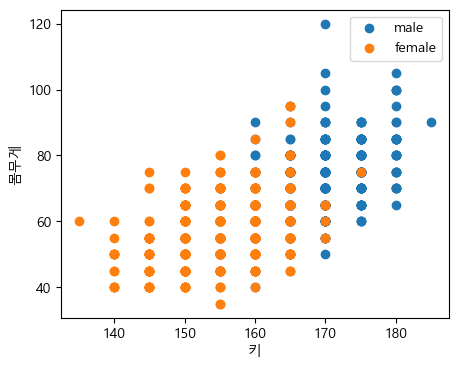

In [72]:
male = health[health.gender == 1]
female = health[health.gender == 2]

plt.figure(figsize=(5,4))
plt.scatter(male.height, male.weight, label='male')
plt.scatter(female.height, female.weight, label='female')

plt.xlabel('키')
plt.ylabel('몸무게')
plt.legend()
plt.show()

- matplotlib.colors.Colormap : colormap()
- plt.get_cmap()

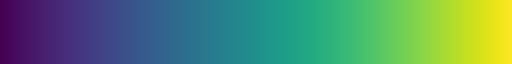

In [73]:
plt.get_cmap()

- spring(), summer(), autumn(), winter()
- bone(), cool(), hot(), flag(), gray()
- hsv(), magma()

In [74]:
plt.set_cmap(plt.spring())

<Figure size 640x480 with 0 Axes>

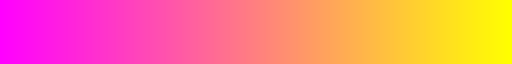

In [75]:
plt.get_cmap()

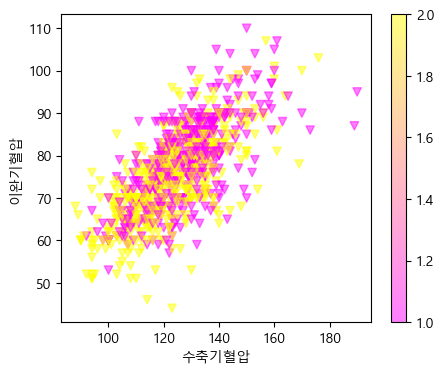

In [79]:
plt.figure(figsize=(5,4))
plt.scatter(health.systolic, health.diastolic, marker='v', 
            c=health.gender, alpha=0.5)
plt.colorbar()
plt.xlabel('수축기혈압')
plt.ylabel('이완기혈압')
plt.show()

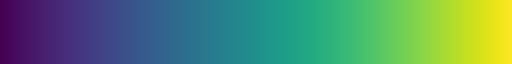

<Figure size 640x480 with 0 Axes>

In [80]:
plt.set_cmap(plt.viridis())
plt.get_cmap()

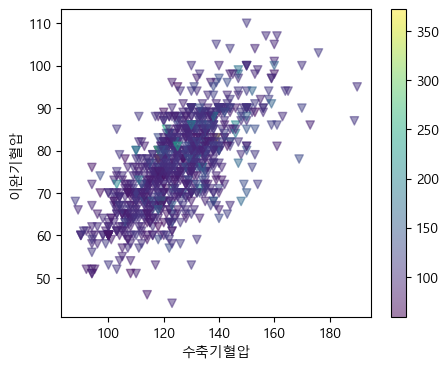

In [81]:
plt.figure(figsize=(5,4))
plt.scatter(health.systolic, health.diastolic, marker='v', 
            c=health.blood_sugar, alpha=0.5)
plt.colorbar()
plt.xlabel('수축기혈압')
plt.ylabel('이완기혈압')
plt.show()

### 버블차트
- 점의 크기와 색상을 이용하여 서로 다른 데이터 값을 표시하는 그래프
- scatter(c, s)를 이용하여 작성
    - s 인수 : size
    - c 인수 : color

#### 데이터 생성

In [82]:
n = 50
x = np.random.rand(n)
y1 = np.random.rand(n)
y2 = np.random.rand(n)
y3 = np.pi*(np.random.rand(n)*15)**2

#### 버블차트

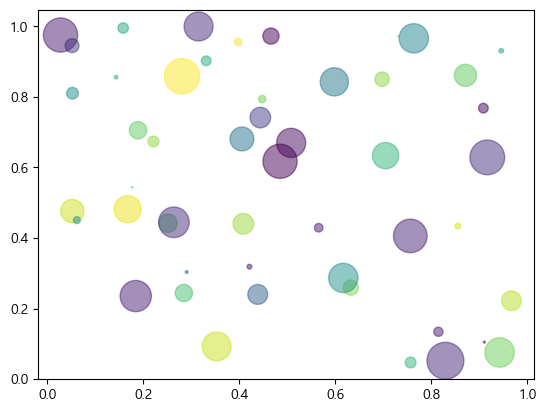

In [83]:
plt.scatter(x, y1, c=y2, s=y3, alpha=0.5)
plt.show()

### 산점도에 colorbar() 적용

- 산점도를 그린 후 colorbar()를 생성하여 색상 정보를 막대로 표현

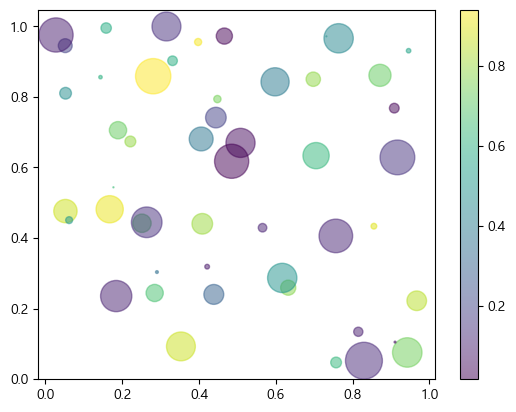

In [84]:
plt.scatter(x, y1, c=y2, s=y3, alpha=0.5)
plt.colorbar()
plt.show()

#### auto 데이터셋

In [85]:
auto = pd.read_csv('data/auto_mpg.csv', header=None)
auto.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [86]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       398 non-null    float64
 1   1       398 non-null    int64  
 2   2       398 non-null    float64
 3   3       398 non-null    object 
 4   4       398 non-null    float64
 5   5       398 non-null    float64
 6   6       398 non-null    int64  
 7   7       398 non-null    int64  
 8   8       398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [87]:
auto.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'accel', 'model_year', 'origin', 'car_name']
auto.head()

,mpg,cylinders,displacement,horsepower,weight,accel,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


#### auto데이터셋 : 산점도

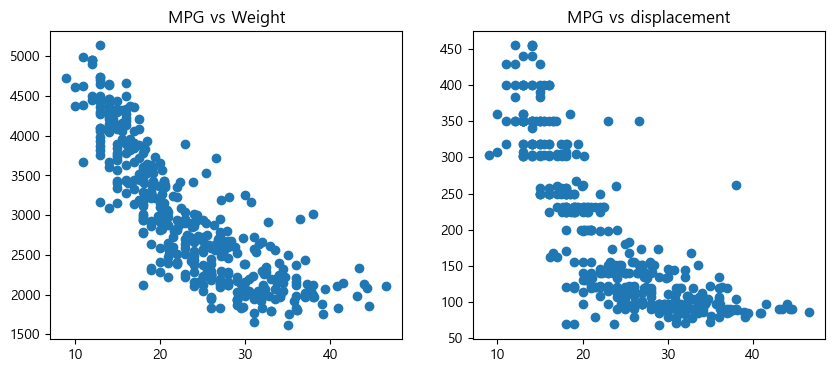

In [94]:
# mpg vs weight
# mpg vs displacement

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(auto.mpg, auto.weight)
plt.title('MPG vs Weight')

plt.subplot(1,2,2)
plt.scatter(auto.mpg, auto.displacement)
plt.title('MPG vs displacement')
plt.show()

In [95]:
# mpg vs weight : color -> cylinders

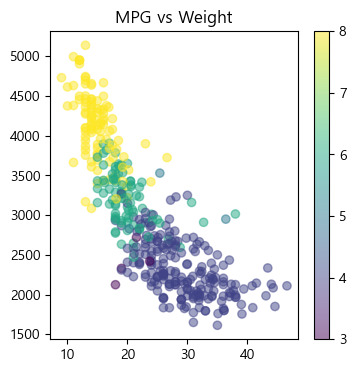

In [101]:
plt.figure(figsize=(4,4))
plt.scatter(auto.mpg, auto.weight, c=auto.cylinders, alpha=0.5)
plt.title('MPG vs Weight')
plt.colorbar()
plt.show()

## 3. 히스토그램 : hist()

- 연속형 수치형 데이터의 분포 시각화 : 이상치, 대칭/비대칭
- 참고. 막대그래프는 범주형 데이터의 빈도(비율) 분포 시각화

- 형식. matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)


https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

#### 데이터생성

In [102]:
np.random.seed(0)
x = np.random.randn(1000)  # 정규난수 1000개 

#### 히스토그램 그리기

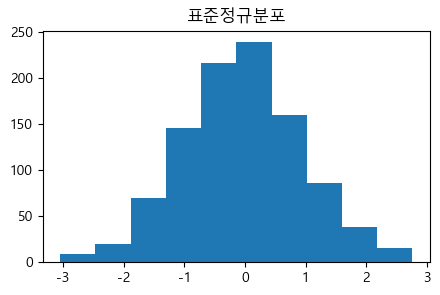

In [103]:
plt.figure(figsize=(5,3))
plt.hist(x)
plt.title('표준정규분포')
plt.show()

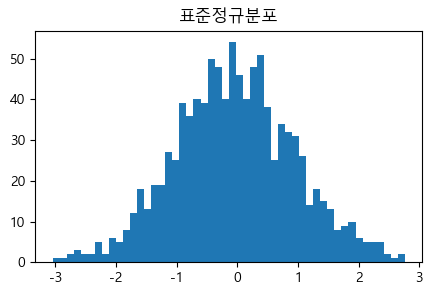

In [106]:
# hist(bins=)

plt.figure(figsize=(5,3))
plt.hist(x, bins=50)
plt.title('표준정규분포')
plt.show()

(array([  9.,  20.,  70., 146., 217., 239., 160.,  86.,  38.,  15.]),
 array([-3.04614305, -2.46559324, -1.88504342, -1.3044936 , -0.72394379,
        -0.14339397,  0.43715585,  1.01770566,  1.59825548,  2.1788053 ,
         2.75935511]))

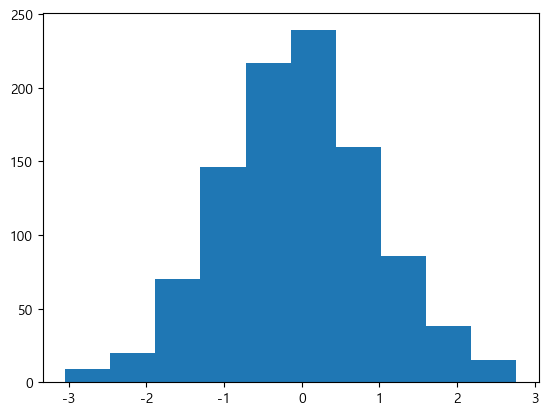

In [108]:
n, bins, patches = plt.hist(x, bins=10)
n, bins

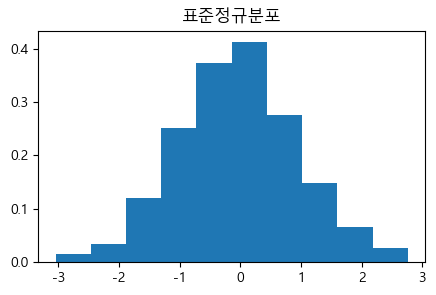

In [110]:
plt.figure(figsize=(5,3))
plt.hist(x, bins=10, density=True)
plt.title('표준정규분포')
plt.show()

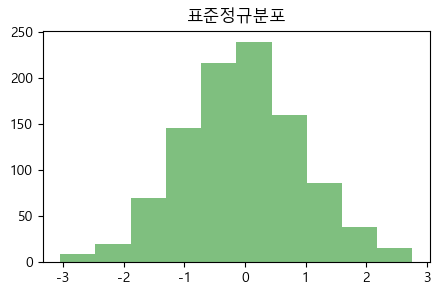

In [111]:
plt.figure(figsize=(5,3))
plt.hist(x, bins=10, facecolor='green', alpha=0.5)
plt.title('표준정규분포')
plt.show()

#### auto 데이터셋

In [112]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   accel         398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


#### 히스토그램 그리기

#### 문제. 

auto-mpg 데이터셋에서 4개의 변수('mpg', 'cylinders', 'displacement', 'weight')에 대한 히스토그램을 한 그림에 그리기

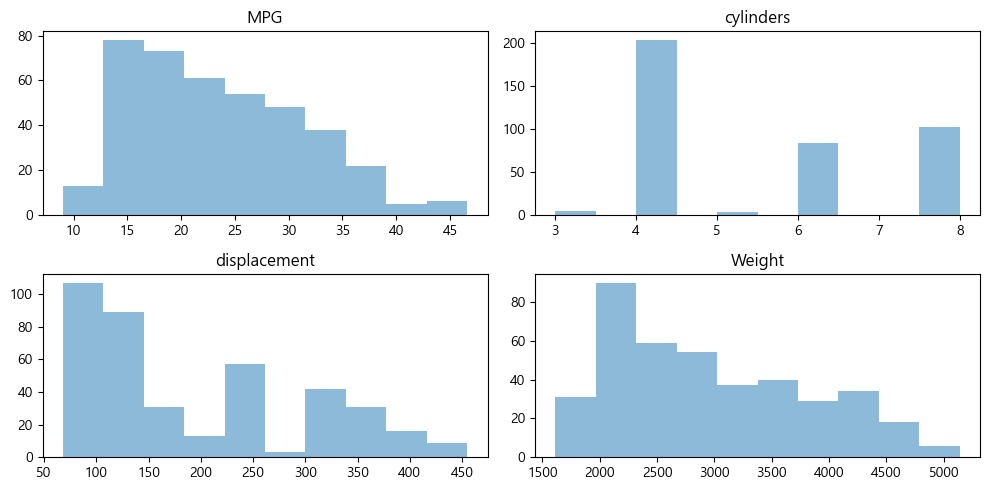

In [128]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.hist(auto.mpg, bins=10, alpha=0.5)
plt.title('MPG')

plt.subplot(2,2,2)
plt.hist(auto.cylinders, bins=10, alpha=0.5)
plt.title('cylinders')

plt.subplot(2,2,3)
plt.hist(auto.displacement, bins=10, alpha=0.5)
plt.title('displacement')

plt.subplot(2,2,4)
plt.hist(auto.weight, bins=10, alpha=0.5)
plt.title('Weight')

plt.tight_layout()
plt.show()

#### 비대칭인 자료를 대칭으로 로그변환

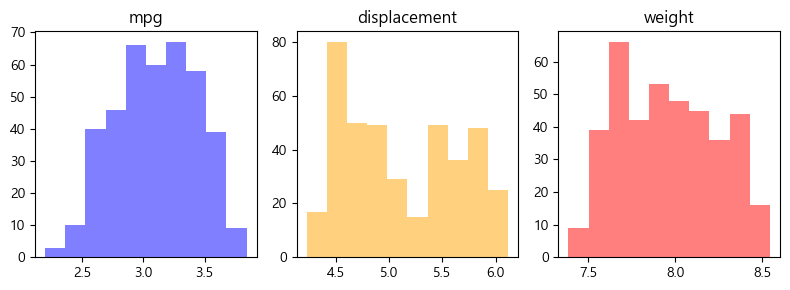

In [132]:
colnames = ['mpg', 'displacement', 'weight']
colors = ['blue', 'orange', 'red']

fig, axs = plt.subplots(1,3, figsize=(8,3), tight_layout=True)

for i in range(3):
    col = colnames[i]
    axs[i].hist(np.log(auto[col]), facecolor=colors[i], alpha=0.5)
    axs[i].set_title(col)

plt.show()

## 4. 박스플롯 : boxplot()

- 데이터의 분포를 파악해주는 플롯
    - 최소값, 제1사분위수, 중위수, 제3사분위수, 최대값
    
- 이상치 데이터 탐색을 위해 사용

- 형식 : matplotlib.pyplot.boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None, capwidths=None, *, data=None)[source]



https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

#### 데이터생성

In [133]:
norm1 = np.random.normal(loc=0, scale=1, size=1000)
norm2 = np.random.normal(loc=5, scale=0.5, size=1000)
norm3 = np.random.normal(loc=10, scale=2, size=1000)

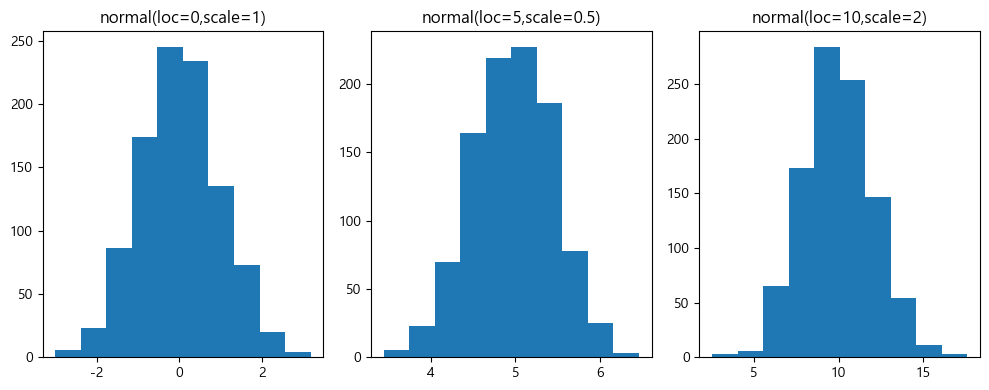

In [136]:
fig, axs = plt.subplots(1,3, figsize=(10,4))
axs[0].hist(norm1)
axs[0].set_title('normal(loc=0,scale=1)')

axs[1].hist(norm2)
axs[1].set_title('normal(loc=5,scale=0.5)')

axs[2].hist(norm3)
axs[2].set_title('normal(loc=10,scale=2)')

plt.tight_layout()
plt.show()

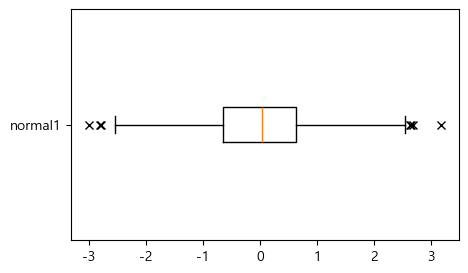

In [141]:
plt.figure(figsize=(5,3))
plt.boxplot(norm1, sym='x', vert=False)
plt.yticks([1], ['normal1'])
plt.show()

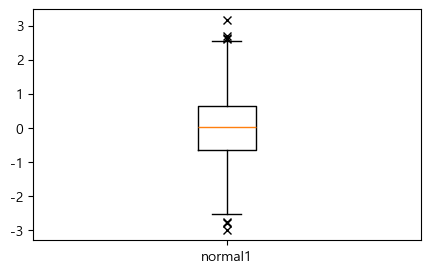

In [142]:
plt.figure(figsize=(5,3))
plt.boxplot(norm1, sym='x', vert=True)
plt.xticks([1], ['normal1'])
plt.show()

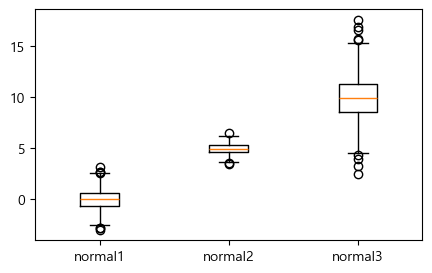

In [143]:
plt.figure(figsize=(5,3))
plt.boxplot((norm1,norm2,norm3))
plt.xticks([1,2,3], ['normal1', 'normal2', 'normal3'])
plt.show()

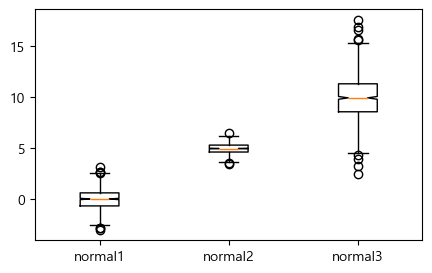

In [144]:
plt.figure(figsize=(5,3))
plt.boxplot((norm1,norm2,norm3), notch=True)
plt.xticks([1,2,3], ['normal1', 'normal2', 'normal3'])
plt.show()

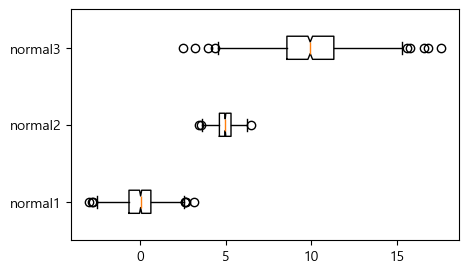

In [145]:
plt.figure(figsize=(5,3))
plt.boxplot((norm1,norm2,norm3), notch=True, vert=False)
plt.yticks([1,2,3], ['normal1', 'normal2', 'normal3'])
plt.show()

#### auto 데이터셋의 'mpg', 'cylinders', 'displacement', 'weight'

#### boxplot

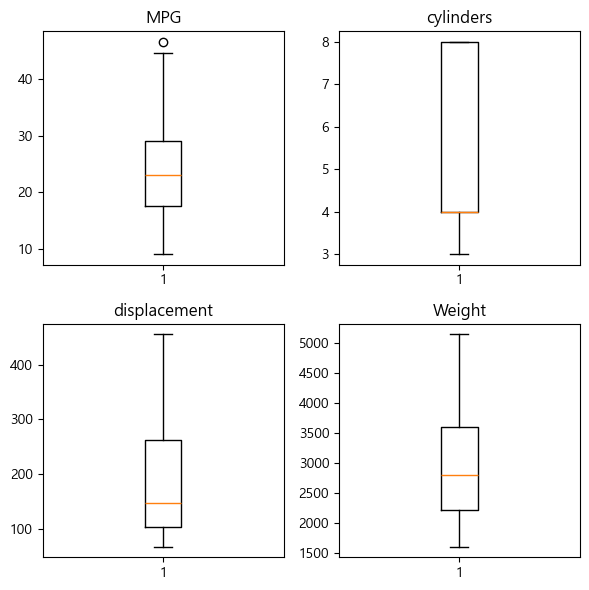

In [149]:
plt.figure(figsize=(6,6))
plt.subplot(2,2,1)
plt.boxplot(auto.mpg)
plt.title('MPG')

plt.subplot(2,2,2)
plt.boxplot(auto.cylinders)
plt.title('cylinders')

plt.subplot(2,2,3)
plt.boxplot(auto.displacement)
plt.title('displacement')

plt.subplot(2,2,4)
plt.boxplot(auto.weight)
plt.title('Weight')

plt.tight_layout()
plt.show()

#### origin의 값에 따른 mpg의 박스플롯

In [150]:
auto.origin.value_counts()

origin
1    249
3     79
2     70
Name: count, dtype: int64

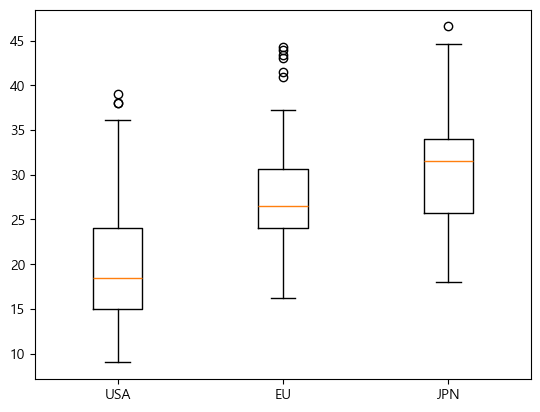

In [151]:
plt.boxplot([auto[auto.origin==1].mpg,
             auto[auto.origin==2].mpg,
             auto[auto.origin==3].mpg], labels=['USA','EU','JPN'])
plt.show()

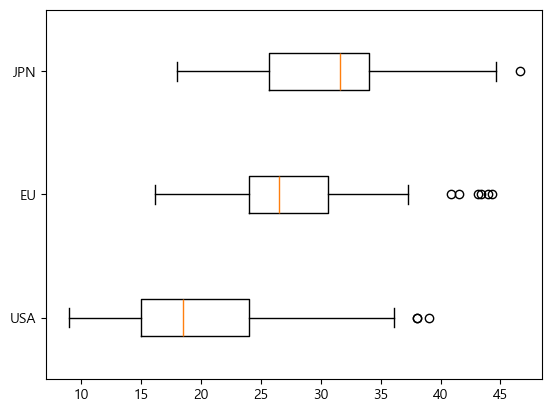

In [152]:
plt.boxplot([auto[auto.origin==1].mpg,
             auto[auto.origin==2].mpg,
             auto[auto.origin==3].mpg], labels=['USA','EU','JPN'], vert=False)
plt.show()

#### 문제. origin의 값에 따른 weight의 박스플롯과 displacement의 박스플롯 한 그림 내에 그리기

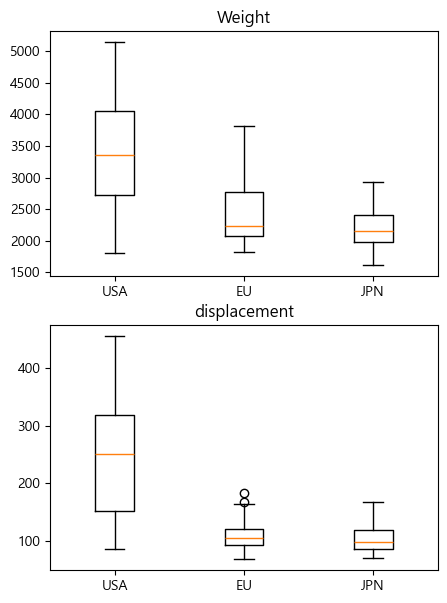

In [155]:
plt.figure(figsize=(5,7))
plt.subplot(2,1,1)
plt.boxplot([auto[auto.origin==1].weight,
             auto[auto.origin==2].weight,
             auto[auto.origin==3].weight], labels=['USA','EU','JPN'])
plt.title('Weight')

plt.subplot(2,1,2)
plt.boxplot([auto[auto.origin==1].displacement,
             auto[auto.origin==2].displacement,
             auto[auto.origin==3].displacement], labels=['USA','EU','JPN'])
plt.title('displacement')
plt.show()

## 5. 파이차트 : pie()

- 범주형 데이터의 빈도(비율)을 비교하기 위해 사용하는 차트
- 원의 형태를 유지할 수 있도록 다음 명령을 실행해야 함
    - plt.axis('equal')
    - 콘솔에서는 별 다른 변화 없으나 plot창에서는 필요함

- 형식 : matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None,  startangle=0, radius=1, ...)


https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html

#### 데이터셋

In [156]:
cnt = [15,20,45,30]
labels = ['김밥', '김치찌개', '짜장면', '돈까스']

#### pie chart 그리기

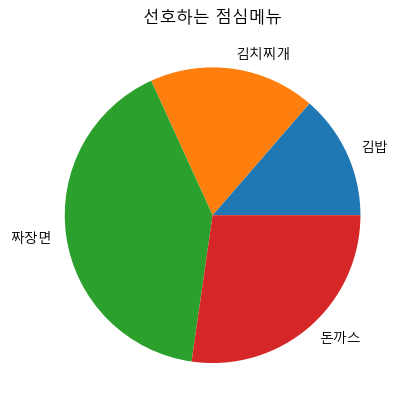

In [157]:
plt.pie(cnt, labels=labels)
plt.title('선호하는 점심메뉴')
plt.show()

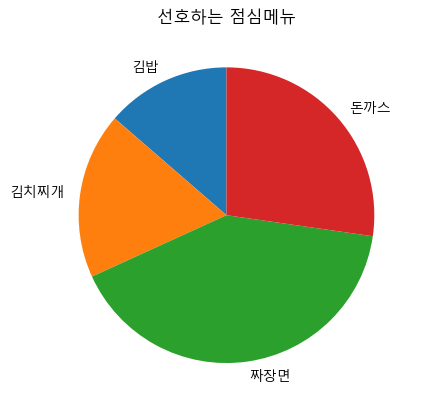

In [158]:
plt.pie(cnt, labels=labels, startangle=90)
plt.title('선호하는 점심메뉴')
plt.show()

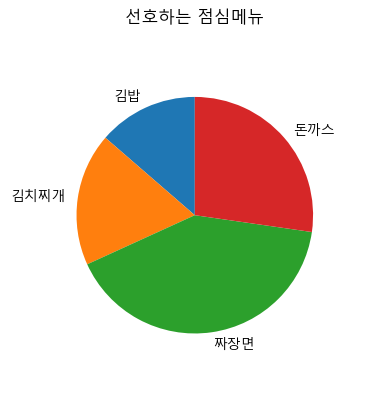

In [159]:
plt.pie(cnt, labels=labels, startangle=90, radius=0.8)
plt.title('선호하는 점심메뉴')
plt.show()

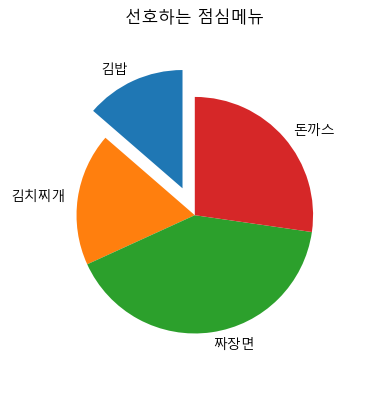

In [160]:
plt.pie(cnt, labels=labels, startangle=90, radius=0.8, explode=[0.2,0,0,0])
plt.title('선호하는 점심메뉴')
plt.show()

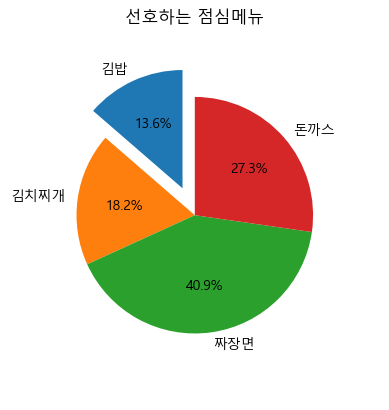

In [162]:
plt.pie(cnt, labels=labels, startangle=90, radius=0.8, 
        explode=[0.2,0,0,0], autopct='%.1f%%')
plt.title('선호하는 점심메뉴')
plt.show()

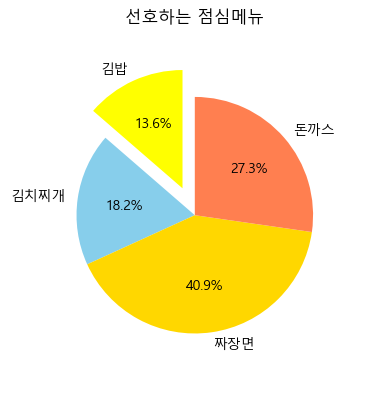

In [163]:
plt.pie(cnt, labels=labels, startangle=90, radius=0.8, 
        explode=[0.2,0,0,0], autopct='%.1f%%',
        colors=['yellow','skyblue','gold','coral'])
plt.title('선호하는 점심메뉴')
plt.show()

#### 문제. auto 데이터셋에서  cylinders, origin에 대한 pie 표현

In [166]:
cyl_cnt = auto.cylinders.value_counts()
cyl_cnt

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

In [167]:
or_cnt = auto.origin.value_counts()
or_cnt

origin
1    249
3     79
2     70
Name: count, dtype: int64

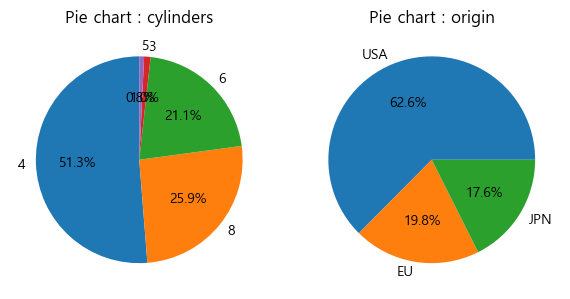

In [171]:
fig, axs = plt.subplots(1,2, figsize=(6,3), tight_layout=True)
axs[0].pie(cyl_cnt, labels=cyl_cnt.index, autopct='%0.1f%%', startangle=90)
axs[0].set_title('Pie chart : cylinders')

axs[1].pie(or_cnt, labels=['USA','EU','JPN'], autopct='%0.1f%%')
axs[1].set_title('Pie chart : origin')

plt.show()

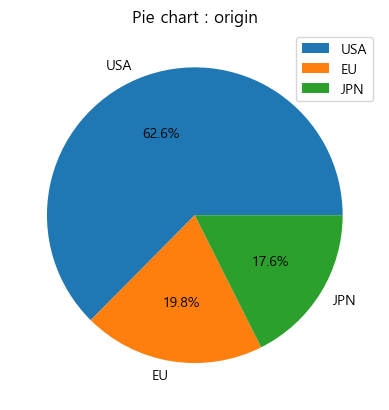

In [172]:
plt.pie(or_cnt, labels=['USA','EU','JPN'], autopct='%0.1f%%')
plt.title('Pie chart : origin')
plt.legend()
plt.show()

-----